In [1]:
import shapefile
import json

# Download Census Tracts "Shapefile" and unzip
# https://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2018_06_tract_500k.zip
# ( From https://www.census.gov/cgi-bin/geo/shapefiles/index.php )

# Filter down to San Diego County (page 15)
# https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2017/TGRSHP2017_TechDoc_Ch3.pdf
# https://www.census.gov/geo/maps-data/maps/2010ref/st06_tract.html
SANDIEGO_FIPS = "073"
reader = shapefile.Reader("data/tl_2018_06_tract.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
geojson = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    feature = dict(type="Feature", \
            geometry=geom, properties=atr)
    if feature["properties"]["COUNTYFP"] != SANDIEGO_FIPS:
        continue
    geojson.append(feature)
len(geojson)

628

In [2]:
import pandas as pd

# Downlaod RASP data from San Diego Regional Data Lib and put in "data/" folder
# https://data.sandiegodata.org/dataset/sandiegodata-org-rasp
rasp_data = pd.read_csv("data/rasp_tracts_sd.csv")
rasp_data

,geoid,col_name,value_est,value_margin,sex,raceeth,age_range,pov,age_min,age_max,overlapping
0,14000US06073000100,B17001A_001,2455,214,both,white,00-120,all,0,120,1
1,14000US06073000100,B17001A_002,102,70,both,white,00-120,below,0,120,1
2,14000US06073000100,B17001A_003,12,16,male,white,00-120,below,0,120,1
3,14000US06073000100,B17001A_004,0,12,male,white,00-004,below,0,4,1
4,14000US06073000100,B17001A_005,0,12,male,white,05-005,below,5,5,1
5,14000US06073000100,B17001A_006,0,12,male,white,06-011,below,6,11,1
6,14000US06073000100,B17001A_007,0,12,male,white,12-014,below,12,14,1
7,14000US06073000100,B17001A_008,0,12,male,white,15-015,below,15,15,1
8,14000US06073000100,B17001A_009,0,12,male,white,16-017,below,16,17,1
9,14000US06073000100,B17001A_010,1,5,male,white,18-024,below,18,24,1


In [3]:
import numpy as np

# Total Population by tract
total_pop = rasp_data[(rasp_data["sex"] == "both") & \
         (rasp_data["raceeth"] == "all") & \
          (rasp_data["pov"] == "all")
         ].sort_values(by="value_est",ascending=False)
total_pop_n = total_pop.agg({'value_est': [np.sum]})
len(total_pop),total_pop_n


(628,      value_est
 sum    3172544)

In [4]:
import numpy as np

# Elderly Population by tract
elder_pop = rasp_data[
    #(rasp_data["sex"] == "both") & \
    (rasp_data["raceeth"] == "all") & \
    (rasp_data["age_min"] >= 65 ) #& \
    #(rasp_data["pov"] == "all")
].groupby("geoid")

total_elders = elder_pop.agg({'value_est': [np.sum]})
total_elders

,value_est
,sum
geoid,
14000US06073000100,875
14000US06073000201,503
14000US06073000202,474
14000US06073000300,742
14000US06073000400,263
14000US06073000500,400
14000US06073000600,432
14000US06073000700,522


In [5]:
PREFIX = '14000US' 

for f in geojson:
    prop = f["properties"]
    prop["total_pop"] = int(total_pop[total_pop["geoid"] == PREFIX + prop["GEOID"]]["value_est"])
    prop["elder_pop"] = int(total_elders.loc[PREFIX + prop["GEOID"],"value_est"])
    if prop["total_pop"] > 0:
        prop["elder_percent"] = round( 
            (float(prop["elder_pop"]) / float(prop["total_pop"]) ) * 100
            ,1)
    else: prop["elder_percent"] = 0
[f["properties"] for f in geojson[:10]] # Quick Check


[{'STATEFP': '06',
  'COUNTYFP': '073',
  'TRACTCE': '008331',
  'GEOID': '06073008331',
  'NAME': '83.31',
  'NAMELSAD': 'Census Tract 83.31',
  'MTFCC': 'G5020',
  'FUNCSTAT': 'S',
  'ALAND': 954205,
  'AWATER': 0,
  'INTPTLAT': '+32.9426037',
  'INTPTLON': '-117.2241058',
  'total_pop': 2459,
  'elder_pop': 244,
  'elder_percent': 9.9},
 {'STATEFP': '06',
  'COUNTYFP': '073',
  'TRACTCE': '008336',
  'GEOID': '06073008336',
  'NAME': '83.36',
  'NAMELSAD': 'Census Tract 83.36',
  'MTFCC': 'G5020',
  'FUNCSTAT': 'S',
  'ALAND': 828562,
  'AWATER': 0,
  'INTPTLAT': '+32.9678415',
  'INTPTLON': '-117.1331584',
  'total_pop': 2209,
  'elder_pop': 272,
  'elder_percent': 12.3},
 {'STATEFP': '06',
  'COUNTYFP': '073',
  'TRACTCE': '008337',
  'GEOID': '06073008337',
  'NAME': '83.37',
  'NAMELSAD': 'Census Tract 83.37',
  'MTFCC': 'G5020',
  'FUNCSTAT': 'S',
  'ALAND': 1566257,
  'AWATER': 0,
  'INTPTLAT': '+32.9583944',
  'INTPTLON': '-117.1357871',
  'total_pop': 4513,
  'elder_pop': 60

In [6]:
with open("docs/census_tracts.json","w") as f:
    f.write(
        json.dumps({
            "type":"FeatureCollection",
            "features":geojson
        },indent=1)
    )
f.close()

In [7]:
#total_pop[total_pop["geoid"] == PREFIX+"06073008503"]

In [8]:
#[f for f in geojson if f["properties"]["GEOID"]=="06073008503"]

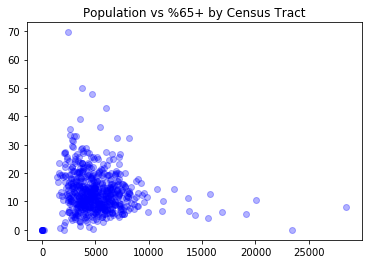

In [10]:
import matplotlib.pyplot as plt
x = [f["properties"]["total_pop"] for f in geojson]
y = [f["properties"]["elder_percent"] for f in geojson]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y,c="blue",alpha=0.3)
plt.title("Population vs %65+ by Census Tract")
plt.show()

